In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
base_dir = 'C:/Users/YASHWANT MOHARIL/OneDrive/Desktop/Images'

In [3]:
IMAGE_SIZE=64
BATCH_SIZE=32

#preprocessing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )
train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)


Found 918 images belonging to 8 classes.


In [4]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=64,strides=1,kernel_size=3,activation='relu',input_shape=(64,64,3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=1))

cnn.add(tf.keras.layers.Dropout(0.5))
#cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu'))
#cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.Dense(8,activation='softmax'))

In [5]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [6]:
cnn.fit(train_datagen,epochs=20)

Epoch 1/20
29/29 [==============================] - 50s 2s/step - loss: 5.6261 - accuracy: 0.1514
Epoch 2/20
29/29 [==============================] - 45s 2s/step - loss: 2.0427 - accuracy: 0.2004
Epoch 3/20
29/29 [==============================] - 47s 2s/step - loss: 2.1027 - accuracy: 0.2789
Epoch 4/20
29/29 [==============================] - 54s 2s/step - loss: 1.7970 - accuracy: 0.3322
Epoch 5/20
29/29 [==============================] - 46s 2s/step - loss: 1.6536 - accuracy: 0.3606
Epoch 6/20
29/29 [==============================] - 44s 2s/step - loss: 1.5264 - accuracy: 0.4259
Epoch 7/20
29/29 [==============================] - 45s 2s/step - loss: 1.3749 - accuracy: 0.4771
Epoch 8/20
29/29 [==============================] - 45s 2s/step - loss: 1.2847 - accuracy: 0.5218
Epoch 9/20
29/29 [==============================] - 45s 2s/step - loss: 1.1625 - accuracy: 0.5664
Epoch 10/20
29/29 [==============================] - 46s 2s/step - loss: 1.0858 - accuracy: 0.5980
Epoch 11/20
29/29 [

In [7]:
train_datagen.class_indices

{'Allwear': 0,
 'Builtup Edge': 1,
 'Crater': 2,
 'Edge': 3,
 'Flank': 4,
 'Healthy': 5,
 'Nose': 6,
 'Notch': 7}

In [83]:
arr = np.empty(115, dtype=object)
arr[0] = 0

In [102]:
for i in range(1, 116):
    from keras.preprocessing import image
    test_image = image.load_img('C:/Users/YASHWANT MOHARIL/OneDrive/Desktop/Images/Notch/Notch TFR File' + str(i) + '.png', target_size = (64,64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = cnn.predict(test_image)
    if result[0][0] == 1:
        print("All wear")
        arr = np.append(arr, 0)
    elif result[0][1] == 1:
        print("Builtup Edge")
        arr = np.append(arr, 1)
    elif result[0][2] == 1:
        print("Crater")
        arr = np.append(arr, 2)
    elif result[0][3] == 1:
        print("Edge")
        arr = np.append(arr, 3)
    elif result[0][4] == 1:
        print("Flank")
        arr = np.append(arr, 4)
    elif result[0][5] == 1:
        print("Healthy")
        arr = np.append(arr, 5)
    elif result[0][6] == 1:
        print("Nose")
        arr = np.append(arr, 6)
    elif result[0][7] == 1:
        print("Notch")
        arr = np.append(arr, 7)

Crater
Crater
Healthy
Healthy
Builtup Edge
Healthy
Healthy
Healthy
Notch
Notch
Nose
Healthy
Crater
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Healthy
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Healthy
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Notch
Nose
Notch
Notch
Notch
Nose
Notch
Notch
Notch
Nose
Nose
Notch
Nose
Nose
Nose
Nose
Notch
Nose
Notch
Nose
Nose
Nose
Nose
Nose
Nose
Builtup Edge
Nose
Nose
Notch
Nose
Nose
Nose
Nose
Nose
Nose
Healthy
Healthy
Nose


In [106]:
print(arr)
arr.size

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 2 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0
 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 5 5 2 5 5 5 5 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 

918

In [105]:
for i in range(1,26):
    arr = np.append(arr,7)

In [38]:
print(result)

[[0. 0. 0. 0. 0. 1. 0. 0.]]


In [12]:
y_pred = cnn.predict(train_datagen)

In [119]:
y_test = train_datagen.classes
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [124]:
y_pred = train_datagen.classes
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 2, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [125]:
y_test = ([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [126]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred, normalize='true')
print(cm)

[[0.93913043 0.03478261 0.02608696 0.         0.         0.
  0.         0.        ]
 [0.6173913  0.28695652 0.09565217 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.8173913  0.12173913 0.         0.06086957
  0.         0.        ]
 [0.         0.         0.         0.88695652 0.11304348 0.
  0.         0.        ]
 [0.         0.         0.         0.         0.8        0.2
  0.         0.        ]
 [0.         0.         0.00884956 0.         0.         0.84955752
  0.14159292 0.        ]
 [0.         0.00869565 0.02608696 0.         0.         0.08695652
  0.7826087  0.09565217]
 [0.         0.00869565 0.         0.         0.         0.03478261
  0.20869565 0.74782609]]


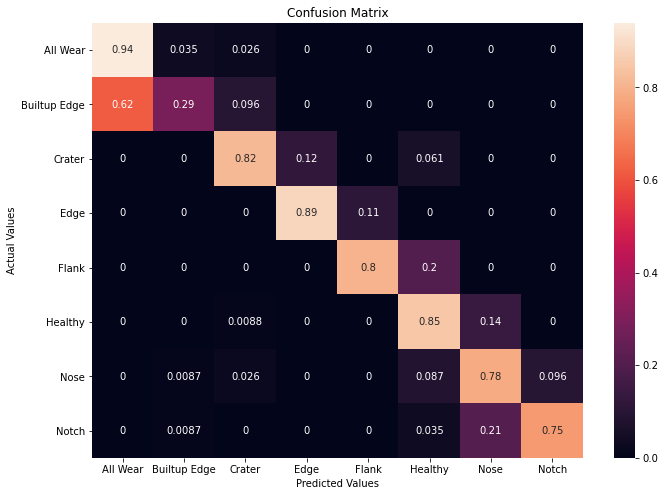

In [156]:
import pandas as pd
cm_df = pd.DataFrame(cm,
                     index = ['All Wear', 'Builtup Edge', 'Crater', 'Edge','Flank','Healthy', 'Nose','Notch'], 
                     columns = ['All Wear', 'Builtup Edge', 'Crater', 'Edge','Flank','Healthy', 'Nose','Notch'])
plt.figure(figsize=(11,8))
f = sn.heatmap(cm_df, annot = True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [158]:
print(metrics.classification_report(y_train, y_pred, digits=3))
  

              precision    recall  f1-score   support

           0      0.603     0.939     0.735       115
           1      0.846     0.287     0.429       115
           2      0.839     0.817     0.828       115
           3      0.879     0.887     0.883       115
           4      0.876     0.800     0.836       115
           5      0.686     0.850     0.759       113
           6      0.692     0.783     0.735       115
           7      0.887     0.748     0.811       115

    accuracy                          0.764       918
   macro avg      0.789     0.764     0.752       918
weighted avg      0.789     0.764     0.752       918

